In [ ]:
pip install ktrain

     |████████████████████████████████| 25.3MB 1.7MB/s 
     |████████████████████████████████| 6.8MB 33.8MB/s 
     |████████████████████████████████| 983kB 50.0MB/s 
     |████████████████████████████████| 266kB 53.5MB/s 
     |████████████████████████████████| 1.9MB 37.9MB/s 
     |████████████████████████████████| 1.2MB 42.2MB/s 
     |████████████████████████████████| 471kB 28.0MB/s 
     |████████████████████████████████| 3.3MB 42.4MB/s 
     |████████████████████████████████| 901kB 45.2MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.2-cp37-none-any.whl size=25277794 sha256=f1b71898d838835e67b0061b1f39eaa96d7b317c0be139998f0bfad86f9cf929
  Stored in directory: /root/.cache/pip/wheels/67/2e/f1/c72afa08df8b2d984b910dea228902ce81dae4511afe9fafd2
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=63858c8a1a5ae724cc11c0f0fd88e4904af1f4020a1c886b922ac4bb7a0dd33b
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d4

In [ ]:
pip install tensorflow

In [ ]:
import ktrain

In [ ]:
from ktrain import vision as vis

In [ ]:
import re

In [ ]:
pattern = r'([^/]+)_\d+_\d+.jpg$'
p = re.compile(pattern)
r = p.search('267_132_00043.jpg')
print(r.group(1))

267


In [ ]:
from google.colab import drive, files
from pathlib import Path
import sys
drive.mount('/content/drive', force_remount = True)
DATADIR = Path("/content/drive/MyDrive/Colab Notebooks/42-696_Sweat Response Project codes/Images_2")
sys.path.append(str(DATADIR.parent))

Mounted at /content/drive


In [ ]:
(train_data, test_data, preproc) = vis.images_from_fname("/content/drive/MyDrive/Colab Notebooks/42-696_Sweat Response Project codes/Images_2", pattern=pattern, is_regression=True, random_state=42,color_mode='rgb',val_pct=0.15)

/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:679: UserWarning: is_regression=True was supplied but targets are strings - casting to floats
  warnings.warn('is_regression=True was supplied but targets are strings - casting to floats')
/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:580: UserWarning: Task is being treated as REGRESSION because either class_names argument was not supplied or is_regression=True. If this is incorrect, change accordingly.
  'either class_names argument was not supplied or is_regression=True. ' + \
/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:679: UserWarning: is_regression=True was supplied but targets are strings - casting to floats
  warnings.warn('is_regression=True was supplied but targets are strings - casting to floats')


['label']
      label
554  1242.0
292   874.0
664  1443.0
331   899.0
118  1676.0
['label']
      label
610  1307.0
818  1896.0
290   871.0
559  1244.0
168   312.0
Found 706 validated image filenames.
Found 125 validated image filenames.


In [ ]:
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized)
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized)
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized)
wrn22: 22-layer Wide Residual Network (randomly initialized)
default_cnn: a default LeNet-like Convolutional Neural Network


In [ ]:
model= vis.image_regression_model('pretrained_resnet50', train_data=train_data, val_data=test_data, metrics=['mae'])

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
94773248/94765736 [==============================] - 1s 0us/step
pretrained_resnet50 model created.


In [ ]:
learner = ktrain.get_learner(model=model, train_data=train_data, val_data=test_data, batch_size=1)

In [ ]:
learner.fit_onecycle(1e-3,12)



begin training using onecycle policy with max lr of 0.001...
Epoch 1/12
706/706 [==============================] - 677s 954ms/step - loss: 979919.7167 - mae: 874.6803 - val_loss: 204434.7344 - val_mae: 365.4716
Epoch 2/12
706/706 [==============================] - 340s 481ms/step - loss: 174498.1479 - mae: 331.8916 - val_loss: 111042.7656 - val_mae: 257.0738
Epoch 3/12
706/706 [==============================] - 338s 479ms/step - loss: 84725.2513 - mae: 224.9050 - val_loss: 61349.3438 - val_mae: 180.1569
Epoch 4/12
706/706 [==============================] - 338s 478ms/step - loss: 36127.1790 - mae: 141.6732 - val_loss: 41885.8086 - val_mae: 133.2945
Epoch 5/12
706/706 [==============================] - 339s 480ms/step - loss: 21751.8091 - mae: 103.1326 - val_loss: 35102.7812 - val_mae: 115.0206
Epoch 6/12
706/706 [==============================] - 338s 479ms/step - loss: 12914.5786 - mae: 74.9829 - val_loss: 30713.6328 - val_mae: 105.6981
Epoch 7/12
706/706 [==========================

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
len(test_data.filenames)

125

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
predicted1 = []
actualval1 = []

In [ ]:
def show_prediction(fname):
    fname = str(DATADIR) + '/' + fname
    pred = round(predictor.predict_filename(fname)[0])
    predicted1.append(pred)
    actual = int(p.search(fname).group(1))
    actualval1.append(actual)
    mae = mean_absolute_error(actualval1,predicted1)
    r2 = r2_score(actualval1,predicted1)
    print("mae = %s | r2 = %s" % (mae,r2))
    vis.show_image(fname)
    print("Predicted Sweat rate = %s | Actual Sweat rate = %s" % (pred, actual))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


mae = 62.0 | r2 = nan
Predicted Sweat rate = 1245 | Actual Sweat rate = 1307
mae = 69.0 | r2 = 0.9445406879375996
Predicted Sweat rate = 1820 | Actual Sweat rate = 1896
mae = 47.666666666666664 | r2 = 0.9817748585638324
Predicted Sweat rate = 876 | Actual Sweat rate = 871
mae = 62.25 | r2 = 0.9612569369583328
Predicted Sweat rate = 1138 | Actual Sweat rate = 1244
mae = 265.4 | r2 = 0.1347573079696841
Predicted Sweat rate = 1390 | Actual Sweat rate = 312
mae = 243.83333333333334 | r2 = 0.31755081684974296
Predicted Sweat rate = 1677 | Actual Sweat rate = 1813
mae = 238.71428571428572 | r2 = 0.4149870657728013
Predicted Sweat rate = 1687 | Actual Sweat rate = 1895
mae = 253.625 | r2 = 0.5636633959831301
Predicted Sweat rate = 613 | Actual Sweat rate = 255
mae = 243.66666666666666 | r2 = 0.5704204388522327
Predicted Sweat rate = 1008 | Actual Sweat rate = 844
mae = 231.7 | r2 = 0.5663995225606075
Predicted Sweat rate = 1112 | Actual Sweat rate = 1236
mae = 225.0 | r2 = 0.5985632294447369


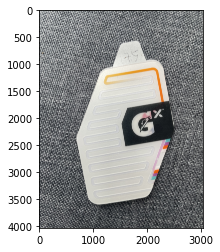

In [ ]:
for i in range(len(test_data.filenames)):
  show_prediction(test_data.filenames[i])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(1,126,1)
x

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125])

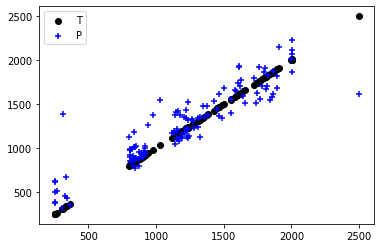

In [ ]:
# Plot outputs
plt.scatter(actualval1, actualval1,  color='black')
plt.scatter(actualval1, predicted1, color='blue',marker="+")
plt.legend('TP')
plt.show()

In [ ]:
pattern1 = r'\d+_([^/]+)_\d+.jpg$'
p = re.compile(pattern1)
r = p.search('267_132_00043.jpg')
print(r.group(1))

132


In [ ]:
(train_data, test_data, preproc) = vis.images_from_fname("/content/drive/MyDrive/Colab Notebooks/Automation for Scientific Research/HW3_02750/Images_2", pattern=pattern1, is_regression=True, random_state=42,color_mode='rgb',val_pct=0.15)

['label']
      label
554  1065.0
292   726.0
664  1130.0
331   751.0
118   736.0
['label']
     label
610  512.0
818  819.0
290  552.0
559  574.0
168  142.0


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:679: UserWarning: is_regression=True was supplied but targets are strings - casting to floats
  warnings.warn('is_regression=True was supplied but targets are strings - casting to floats')
/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:580: UserWarning: Task is being treated as REGRESSION because either class_names argument was not supplied or is_regression=True. If this is incorrect, change accordingly.
  'either class_names argument was not supplied or is_regression=True. ' + \
/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:679: UserWarning: is_regression=True was supplied but targets are strings - casting to floats
  warnings.warn('is_regression=True was supplied but targets are strings - casting to floats')


Found 706 validated image filenames.
Found 125 validated image filenames.


In [ ]:
model1= vis.image_regression_model('pretrained_resnet50', train_data=train_data, val_data=test_data, metrics=['mae'])

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
pretrained_resnet50 model created.


In [ ]:
learner1 = ktrain.get_learner(model=model1, train_data=train_data, val_data=test_data, batch_size=1)

In [ ]:
learner1.fit_onecycle(1e-3,12)



begin training using onecycle policy with max lr of 0.001...
Epoch 1/12
706/706 [==============================] - 350s 490ms/step - loss: 304236.6064 - mae: 485.1661 - val_loss: 46455.7969 - val_mae: 171.6188
Epoch 2/12
706/706 [==============================] - 336s 476ms/step - loss: 35686.9912 - mae: 147.9722 - val_loss: 25801.8516 - val_mae: 122.4772
Epoch 3/12
706/706 [==============================] - 337s 478ms/step - loss: 15998.5598 - mae: 99.4027 - val_loss: 21214.2852 - val_mae: 111.4672
Epoch 4/12
706/706 [==============================] - 337s 477ms/step - loss: 12381.0955 - mae: 85.4768 - val_loss: 17447.7930 - val_mae: 99.3143
Epoch 5/12
706/706 [==============================] - 337s 477ms/step - loss: 9522.6600 - mae: 75.0919 - val_loss: 17259.9062 - val_mae: 98.8282
Epoch 6/12
706/706 [==============================] - 336s 476ms/step - loss: 8864.4018 - mae: 70.9694 - val_loss: 17739.2441 - val_mae: 102.9959
Epoch 7/12
706/706 [==============================] - 33

In [ ]:
predictor1 = ktrain.get_predictor(learner1.model1, preproc)

In [ ]:
predicted = []
actualval = []

In [ ]:
def show_prediction(fname):
    fname = str(DATADIR) + '/' + fname
    pred = round(predictor.predict_filename(fname)[0])
    predicted.append(pred)
    actual = int(p.search(fname).group(1))
    actualval.append(actual)
    mae = mean_absolute_error(actualval,predicted)
    r2 = r2_score(actualval,predicted)
    print("mae = %s | r2 = %s" % (mae,r2))
    vis.show_image(fname)
    print("Predicted Sodium level = %s | Actual Sodim level= %s" % (pred, actual))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


mae = 99.0 | r2 = nan
Predicted Sodium level = 611 | Actual Sodim level= 512
mae = 83.5 | r2 = 0.6938959564557714
Predicted Sodium level = 887 | Actual Sodim level= 819
mae = 127.0 | r2 = -0.08092115497373431
Predicted Sodium level = 766 | Actual Sodim level= 552
mae = 96.75 | r2 = -0.04119814593223925
Predicted Sodium level = 580 | Actual Sodim level= 574
mae = 183.8 | r2 = -0.4528026719844529
Predicted Sodium level = 674 | Actual Sodim level= 142
mae = 158.0 | r2 = -0.1651690560905621
Predicted Sodium level = 815 | Actual Sodim level= 786
mae = 141.71428571428572 | r2 = -0.04342541103295594
Predicted Sodium level = 814 | Actual Sodim level= 770
mae = 165.125 | r2 = 0.1285566411855722
Predicted Sodium level = 457 | Actual Sodim level= 128
mae = 151.88888888888889 | r2 = 0.15112148879916454
Predicted Sodium level = 717 | Actual Sodim level= 671
mae = 141.4 | r2 = 0.24382224718134082
Predicted Sodium level = 874 | Actual Sodim level= 827
mae = 133.8181818181818 | r2 = 0.2769486611678050

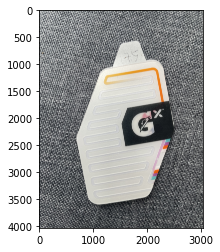

In [ ]:
for i in range(len(test_data.filenames)):
  show_prediction(test_data.filenames[i])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(1,126,1)
x

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125])

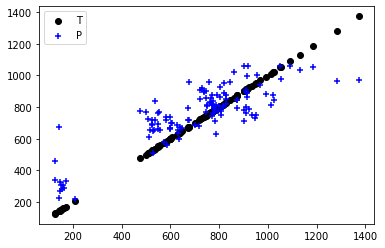

In [ ]:
# Plot outputs
plt.scatter(actualval, actualval,  color='black')
plt.scatter(actualval, predicted, color='blue',marker='+')
plt.legend("TP")

plt.show()

In [ ]:
fname = '/content/drive/MyDrive/Colab Notebooks/Automation for Scientific Research/HW3_02750/33.jpg'
pred = round(predictor.predict_filename(fname)[0])
#actual = int(p.search(fname).group(1))

In [ ]:
pred

1065